# 프로젝트: 인물 모드 문제점 찾기

In [1]:
# importlib: 사용자가 파이썬의 import 시스템과 상호작용하기 위한 API를 제공하는 내장 라이브러리
# 사용자는 import 함수의 구현 내용과, 실행에 필요한 하위 함수들을 이용해 필요에 맞는 임포터를 직접 구현하거나 임포트 관련 기능들을 자유롭게 사용할 수 있음
# importlib.metadata: 설치된 패키지 메타 데이터에 대한 접근을 제공하는 라이브러리.
# 해당 코드 블럭에서는 importlib.metadata 안에 있는 version() 함수를 이용하여 pixellib 라이브러리의 버전을 확인

from importlib.metadata import version
import pixellib

import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt
print(cv2.__version__)
print(version('pixellib'))

4.5.3
0.7.1


(2560, 1920, 3)


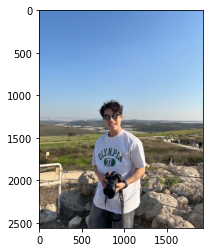

In [2]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/itsme.jpg'  
img_orig = cv2.imread(img_path) # cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장

print(img_orig.shape)

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)


### 시맨틱 세그멘테이션

In [3]:
# 저장할 파일 이름을 결정합니다
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels1.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels1.h5',
 <http.client.HTTPMessage at 0x7f7b611633a0>)

In [4]:
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

In [5]:
segvalues, output = model.segmentAsPascalvoc(img_path) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용

In [6]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

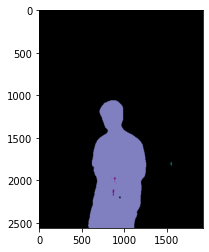

In [7]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [8]:
segvalues # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력

{'class_ids': array([ 0,  3,  5, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [9]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
bird
bottle
person


In [10]:
seg_color = (128,128,192) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

(2560, 1920)


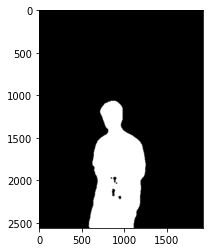

In [11]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

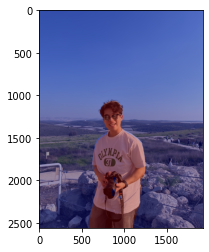

In [12]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### 배경 흐리게 만들기

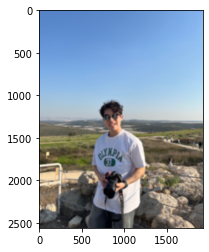

In [13]:
# (13,13)은 blurring kernel size를 뜻함
img_orig_blur = cv2.blur(img_orig, (17,17))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

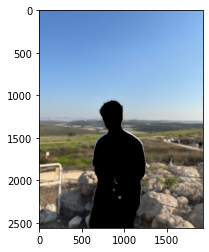

In [14]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

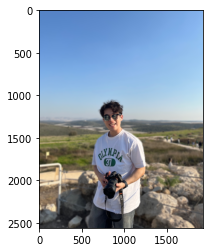

In [15]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### 2번째 사진

In [16]:
itsme1_img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/itsme1.jpg'

In [17]:
itsme1_img_orig = cv2.imread(itsme1_img_path)

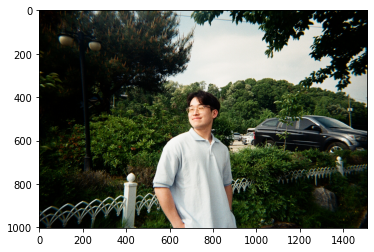

In [18]:
plt.imshow(cv2.cvtColor(itsme1_img_orig, cv2.COLOR_BGR2RGB))
plt.show()

### DeepLab 모델에 이미지 입력 후 출력 확인

In [19]:
itsme1_segvalues, itsme1_output = model.segmentAsPascalvoc(itsme1_img_path) # 모델에 이미지 입력

In [20]:
# 영역 검출된 클래스 출력
for class_id in itsme1_segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
car
person


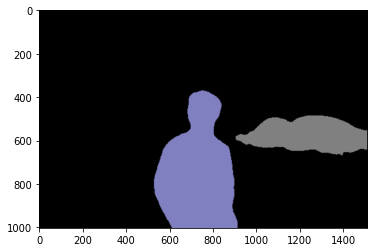

In [21]:
plt.imshow(itsme1_output)
plt.show()

### seg_color로만 이루어진 마스크 생성
colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어    
output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 된다

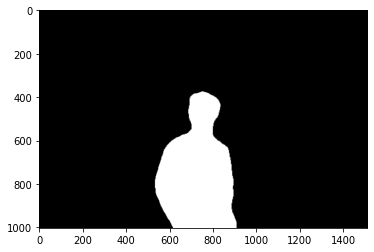

In [22]:
itsme1_seg_map = np.all(itsme1_output==seg_color, axis=-1)
plt.imshow(itsme1_seg_map, cmap='gray')
plt.show()

### 원본 이미지와 합친 후 segmentation 확인

In [23]:
'''itsme1_img_show = itsme1_img_orig.copy() # 원본이미지를 img_show에 할당
itsme1_img_mask = seg_map.astype(np.uint8)*255 # True과 False인 값을 각각 255과 0으로
itsme1_color_mask = cv2.applyColorMap(itsme1_img_mask, cv2.COLORMAP_JET)
itsme1_img_show = cv2.addWeighted(itsme1_img_show, 0.6, itsme1_color_mask, 0.4, 0.0)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
plt.imshow(cv2.cvtColor(itsme1_img_show, cv2.COLOR_BGR2RGB))
plt.show()'''

'itsme1_img_show = itsme1_img_orig.copy() # 원본이미지를 img_show에 할당\nitsme1_img_mask = seg_map.astype(np.uint8)*255 # True과 False인 값을 각각 255과 0으로\nitsme1_color_mask = cv2.applyColorMap(itsme1_img_mask, cv2.COLORMAP_JET)\nitsme1_img_show = cv2.addWeighted(itsme1_img_show, 0.6, itsme1_color_mask, 0.4, 0.0)\n\n# 원본 이미지와 마스트를 적당히 합쳐봅니다\n# 0.6과 0.4는 두 이미지를 섞는 비율입니다.\nplt.imshow(cv2.cvtColor(itsme1_img_show, cv2.COLOR_BGR2RGB))\nplt.show()'

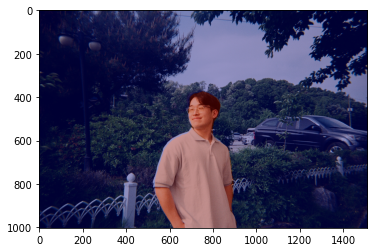

In [24]:
itsme1_img_show = itsme1_img_orig.copy() # 원본이미지를 img_show에 할당
itsme1_img_mask = itsme1_seg_map.astype(np.uint8)*255 # True과 False인 값을 각각 255과 0으로
itsme1_color_mask = cv2.applyColorMap(itsme1_img_mask, cv2.COLORMAP_JET)
itsme1_img_show = cv2.addWeighted(itsme1_img_show, 0.6, itsme1_color_mask, 0.4, 0.0)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
plt.imshow(cv2.cvtColor(itsme1_img_show, cv2.COLOR_BGR2RGB))
plt.show()

- 위 에러가 발생하여 디버깅을 하던 도중, OpenCV 함수를 사용할 때는 채널까지 정확하게 3채널로 동일하게 맞추어줘야 작동한다는 사실을 알게 되었음
- 2번째 줄 itsme1_img_mask = seg_map.astype(np.uint8)*255에서 __seg_map.astype__은 위 첫번째 사진에서 사용한 것이므로 지금 두번째 사진과는 채널이 맞지 않음
- 2번째 사진에서 사용한 __itsme1_seg_map__로 변경함으로 해결!

### 배경 흐리게 하기

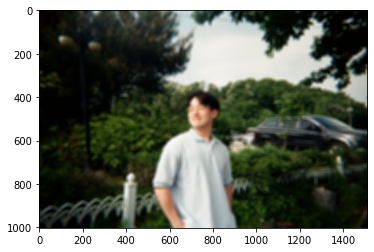

In [25]:
itsme1_img_orig_blur = cv2.blur(itsme1_img_orig, (17,17)) # blurring kernel size

plt.imshow(cv2.cvtColor(itsme1_img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

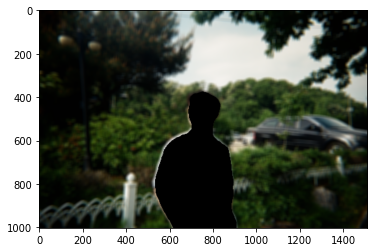

In [26]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB : 원본이 BGR 순서로 픽셀을 읽기 때문에 이미지 색상 채널 변경(BGR 형식을 RGB 형식으로)
itsme1_img_mask_color = cv2.cvtColor(itsme1_img_mask, cv2.COLOR_GRAY2BGR)
itsme1_img_bg_mask = cv2.bitwise_not(itsme1_img_mask_color)# 이미지 반전

itsme1_img_bg_blur = cv2.bitwise_and(itsme1_img_orig_blur, itsme1_img_bg_mask) # 배경만 있는 영상
# and 연산 시 사람이 0인 경우 모든 픽셀이 0이 됨
plt.imshow(cv2.cvtColor(itsme1_img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

어깨선이 조금 덜 따인 느낌이어서 아쉬움이 느껴진다

### 흐린 배경과 원본 영상 합성

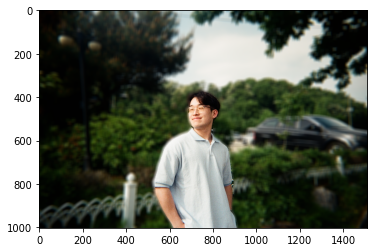

In [27]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
itsme1_img_concat = np.where(itsme1_img_mask_color==255, itsme1_img_orig, itsme1_img_bg_blur)
plt.imshow(cv2.cvtColor(itsme1_img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### 원본과 합성 영상 비교

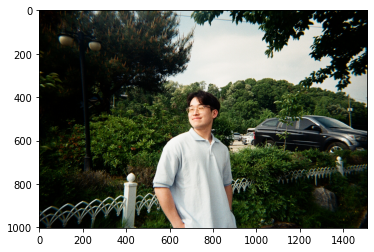

In [28]:
plt.imshow(cv2.cvtColor(itsme1_img_orig, cv2.COLOR_BGR2RGB))#, cv2.cvtColor(itsme1_img_concat, cv2.COLOR_BGR2RGB))
plt.show()

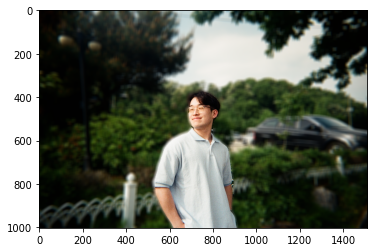

In [29]:
plt.imshow(cv2.cvtColor(itsme1_img_concat, cv2.COLOR_BGR2RGB))
plt.show()

- 문제점: 어깨선이 조금 흐릿해 보이는 모습을 보인다


### 크로마키 배경: 멋진 초원에서의 사진!

In [30]:
# 어떤 이미지인가?
back_img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/back.jpg'
back_img_orig = cv2.imread(back_img_path)

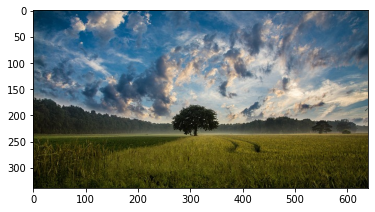

In [31]:
plt.imshow(cv2.cvtColor(back_img_orig, cv2.COLOR_BGR2RGB))

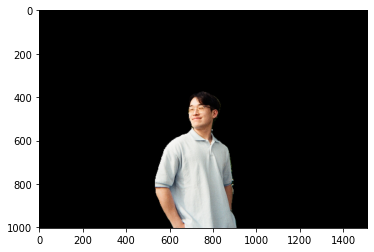

In [32]:
# 사진에서 사람만 남기기
itsme1_person_img_concat = np.where(itsme1_img_mask_color==255, itsme1_img_orig, 0)
plt.imshow(cv2.cvtColor(itsme1_person_img_concat, cv2.COLOR_BGR2RGB))

### cv2.resize(src, dsize, dst=None, fx=None, fy=None, interpolation=None)
- src: input image
- dsize: 결과 영상 크기. (w, h) 튜플. (0, 0)이면 fx와 fy 값을 이용하여 결정
- dst: output image
- fx, fy: x와 y방향 스케일 비율(scale factor). (dsize 값이 0일 때 유효)
- interpolation: 보간법, default = cv2.INTER_LINEAR
출처: https://aliencoder.tistory.com/90

In [33]:
# 배경 이미지 설정
#h, w, c = back_img_orig.shape
back_img_resize = cv2.resize(back_img_orig, (1512,1002), interpolation = cv2.INTER_CUBIC)

In [34]:
back_img_show = back_img_orig.copy()

cv2.addWeighted(src1, alpha, src2, beta, gamma, dst=None, dtype=None) -> dst

- src1: (입력) 첫 번째 영상
- alpha: 첫 번째 영상 가중치
- src2: 두 번째 영상. src1과 같은 크기 & 같은 타입
- beta: 두 번째 영상 가중치
- gamma: 결과 영상에 추가적으로 더할 값
- dst: 가중치 합 결과 영상
- dtype: 출력 영상(dst)의 타입

In [35]:
'''back_itsme_concat = cv2.addWeighted(itsme1_person_img_concat, 0.5, back_img_resize, 0.5, 0)

cv2.imshow('back_itsme_concat', back_itsme_concat)'''

"back_itsme_concat = cv2.addWeighted(itsme1_person_img_concat, 0.5, back_img_resize, 0.5, 0)\n\ncv2.imshow('back_itsme_concat', back_itsme_concat)"

위 코드만 돌리면 커널이 멈추는 현상 발생

# 문제점 찾기

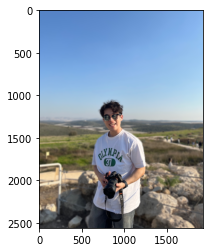

In [37]:
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

원본 영상과 blur 처리가 된 영상의 차이가 크게 없어 보인다

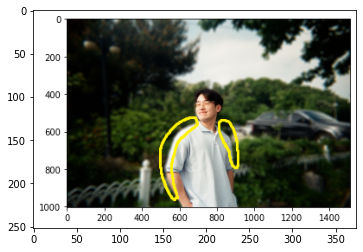

In [39]:
error_img = os.getenv('HOME')+'/aiffel/human_segmentation/images/itsme_blur_e.png'
error_img_orig = cv2.imread(error_img)
plt.imshow(cv2.cvtColor(error_img_orig, cv2.COLOR_BGR2RGB))

문제점 : 옷과 배경의 경계선이 흐릿해지는 현상이 발생하였다

# 해결 방안

### 1. 언샤프 마스크 필터 적용
- 날카롭지 않은(unsharp) 영상, 즉 부드러워진 영상을 이용하여 날카로운 영상을 생성
- 기존 영상의 픽셀 + (기존 영상의 픽셀 - 가우시안 필터링으로 블러가 적용된 영상의 픽셀)로 만들 수 있다.
-  np.clip 함수로 언샤프 마스크 필터를 구현할 수 있다.
- https://deep-learning-study.tistory.com/155

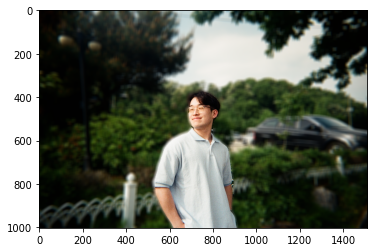

In [44]:
#img = cv2.imread(itsme1_img_concat, cv2.COLOR_BGR2GRAY)
blr = cv2.GaussianBlur(itsme1_img_concat, (0, 0), 2) # 표준편차는 2, 필터 크기는 자동 설정됨

sharp = 2.0 # 샤프닝 정도 결정
dst = np.clip((1+sharp)*itsme1_img_concat - sharp * blr, 0, 255).astype(np.uint8)

plt.imshow(cv2.cvtColor(itsme1_img_concat, cv2.COLOR_BGR2RGB))

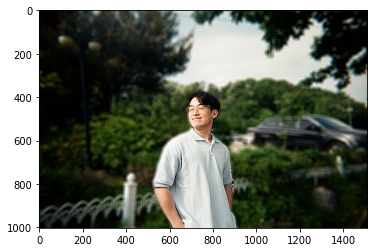

In [45]:
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

얼굴 경계선은 보다 더 정확해졌지만 옷 경계선은 여전히 모호하게 보인다

### Super-Resolution (초해상도)
-  초해상도 기술은 저해상도 이미지를 고해상도 이미지로 변환하는 기술
- 딥러닝 기반의 Super-Resolution 네트워크들은 저해상도 이미지에 대한 고해상도 예측을 수행 
- SRCNN, ESPCN, SRGAN 등이 있다

In [46]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D
from tensorflow.keras.models import Model

# 초해상도 (SR) 모델 구조 정의 (컬러 이미지)
def build_sr_model(input_shape, scale_factor):
    # 인코더 정의
    input_img = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

    # 업샘플링 정의
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D(size=(scale_factor, scale_factor))(x)

    # 디코더 정의
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    # 모델 정의
    sr_model = Model(inputs=input_img, outputs=decoded)

    return sr_model

# 모델 생성 (컬러 이미지용)
input_shape = (64, 64, 3)  # 예제로 입력 이미지 크기를 64x64로 설정하고, 컬러 이미지는 3채널(RGB)
scale_factor = 2           # 초해상도 비율

sr_model_color = build_sr_model(input_shape, scale_factor)

# 모델 컴파일
sr_model_color.compile(optimizer='adam', loss='mean_squared_error')

# 모델 요약
sr_model_color.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 256)       147712    
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 128, 128, 256)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 3)       6915      
Total params: 193,347
Trainable params: 193,347
Non-trainable params: 0
_______________________________________________________

# 회고

- 눈으로 바로 결과를 확인할 수 있는 부분이기에 즐겁게 프로젝트를 진행했습니다.
- 변수명을 직관적으로 설정했지만 이름이 길어지는 바람에 함수 중간에 인자로 들어가는 부분을 신경쓰느라 고생했던 파트였습니다.
- 실제로 이것 때문에 오류가 많이 발생하였고, 철자 확인에 시간을 오래 쏟았습니다.
- 크로마키 영상 합치는 코드에서는 계속 커널이 멈추는 경우가 발생하여 아쉽게도 결과를 확인하지 못했습니다.
- 문제 해결방안 시도 중 초해상도를 접목하여 문제를 해결하려 하였으나 모델을 학습시키는 과정에서 많은 양의 저해상도 대비 고해상도 영상이 필요했기에 다음에 데이터가 충분하다면 시도해보려 합니다